/tmp/ipykernel_1506/4243822144.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, Audiodata = wavfile.read(AudioName)
/tmp/ipykernel_1506/4243822144.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq)) #Power spectrum
/tmp/ipykernel_1506/4243822144.py:28: RuntimeWarning: invalid value encountered in multiply
  plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq)) #Power spectrum
/tmp/ipykernel_1506/4243822144.py:37: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  f, t, Sxx = signal.spectrogram(Audiodata, fs,window = signal.blackman(N),nfft=N)


ValueError: window is longer than input signal

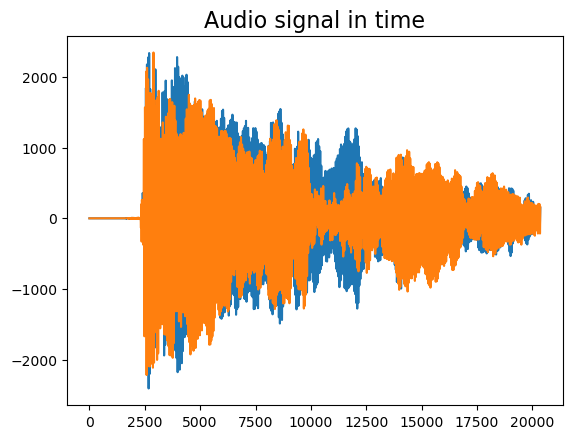

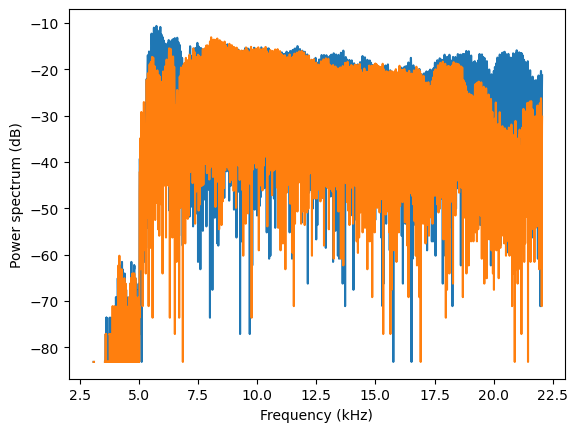

In [5]:
from scipy.io import wavfile # scipy library to read wav files
import numpy as np

AudioName = "Original Piano.wav" # Audio File
fs, Audiodata = wavfile.read(AudioName)

# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(Audiodata)
plt.title('Audio signal in time',size=16)

# spectrum
from scipy.fftpack import fft # fourier transform
n = len(Audiodata) 
AudioFreq = fft(Audiodata)
AudioFreq = AudioFreq[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = (AudioFreq) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2
if n % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

plt.figure()
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq)) #Power spectrum
plt.savefig('Power')
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');


#Spectrogram
from scipy import signal
N = 512 #Number of point in the fft
f, t, Sxx = signal.spectrogram(Audiodata, fs,window = signal.blackman(N),nfft=N)
plt.figure()
plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
#plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [seg]')
plt.title('Spectrogram with scipy.signal',size=16);
plt.savefig('Power')
plt.show()

In [6]:
import pandas as pd
data = pd.read_csv('RUIZ_Power_Spectrum.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt
x = data[0]
y = data[1]
plt.plot(x, y,'r--')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'RUIZ_Power_Spectrum.txt'